This notebook is part of the ``deepcell-tf`` documentation: https://deepcell.readthedocs.io/.

In [3]:
import os
import numpy as np

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)

from tensorflow.python.keras import backend as K

from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from deepcell.applications import CellTrackingModel
from deepcell.applications import CytoplasmSegmentation
from deepcell_tracking import CellTracker
from deepcell.datasets.cytoplasm import hela_s3

In [10]:
((X_train, y_train),(X_test, y_test)) = hela_s3.load_data()

In [11]:
im = X_test
im.shape

(331, 512, 512, 1)

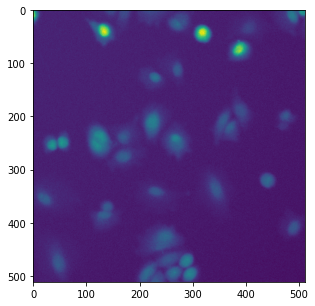

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
i = 327
ax.imshow(im[i,...,0])

In [8]:
app = CytoplasmSegmentation()

W0413 18:35:59.186448 140237798070080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


310222848/310220752 [==============================] - 20s 0us/step


In [12]:
print('Training Resolution:', app.model_mpp, 'microns per pixel')

Training Resolution: 0.65 microns per pixel


In [13]:
labeled_im = app.predict(im, image_mpp=0.65)
labeled_im = np.expand_dims(labeled_im, axis=-1)
labeled_im.shape

(331, 512, 512, 1)

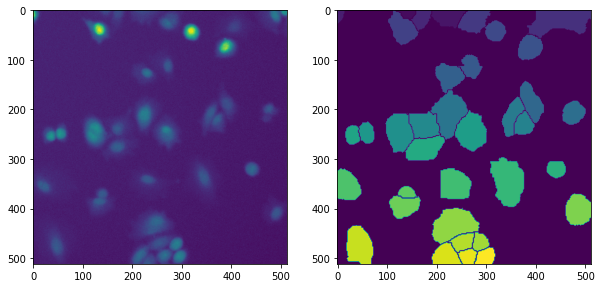

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(im[i,...,0])
ax[1].imshow(labeled_im[i,...,0], cmap='jet')